# tensorflow for MNIST Fashion

--------------------Loading Dataset----------------------------------------_
Tshirt
--------------------Data Normalization--------------------------------------
x_train_full/ 255.
--------------------Data splitting------------------------------------------
Examples in validation set (to optimize the model and tuning hyper paremters) = 5,000
Examples in test set (to test the model)= 10,000
Examples in train set (to train the model) = 55,000
--------------------Building Sequential neural network using keras------------
--------------------INPUT > HIDDEN 1 > RELU > HIDDEN 2 > RELU > SOFTMAX-------

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 300)               235500    
                                            

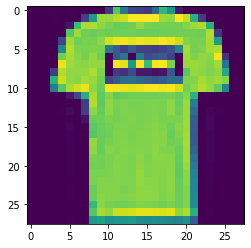

In [19]:
# load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pydot

# load the data set
print("--------------------Loading Dataset----------------------------------------_")
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# acess data
plt.imshow(x_train_full[1]) # A 20 x 20 pixel image

# renaming class names
class_names  = ["Tshirt", "Trouser", "Pullover", "Dress", "coat", "sandal", "shirt", "sneaker", "bag", "Anklet boot"] # created a list of class names
print(class_names[y_train_full[1]]) # y_train_full[1] is 0 and class_names[0] is Tshirt

print("--------------------Data Normalization--------------------------------------")

x_train_n = x_train_full/ 255.
x_test_n = x_test/ 255.    # divinding by float 255.0 to get answer in float. if divided by 255 , answer will be integer

print("x_train_full/ 255.")

print("--------------------Data splitting------------------------------------------")

x_valid, x_train = x_train_n[: 5000], x_train_n[5000 :]
y_valid, y_train = y_train_full[: 5000], y_train_full[5000 :]
x_test = x_test_n

print ("Examples in validation set (to optimize the model and tuning hyper paremters) = 5,000")
print ("Examples in test set (to test the model)= 10,000")
print ("Examples in train set (to train the model) = 55,000")

print("--------------------Building Sequential neural network using keras------------")
print("--------------------INPUT > HIDDEN 1 > RELU > HIDDEN 2 > RELU > SOFTMAX-------")
print(      )
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = "relu")) # first hidden layer with 300 nodes and relu activation
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.summary()

#keras.utils.plot_model(model) # needs pydot to install. Ignore it

weights, biases = model.layers[1].get_weights() # getting information of Initial weights and biases
#print(weights)
#print(biases)
print("The shape of wieght matrix for layer one is = ", weights.shape)
print("The shape of bias matrix for layer one is = ",biases.shape)

print("--------------------Compiling the model------------")

model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
model_history = model.fit(x_train, y_train, epochs = 30, validation_data=(x_valid, y_valid))